# Overview

This Notebook is created for **The Kaggle playground series S5E7** competition. The goal is to predict whether a person is an **Introvert** or **Extrovert**, given their social behavior and personality traits.The dataset for this competition (both train and test) was generated from a deep learning model trained on the Extrovert vs. Introvert Behavior dataset. Feature distributions are close to, but not exactly the same, as the original.



### Data Dictionary
* `Time_spent_Alone :` Hours spent alone daily (0–11).
* `Stage_fear:` Presence of stage fright (Yes/No).
* `Social_event_attendance:` Frequency of social events (0–10).
* `Going_outside:` Frequency of going outside (0–7).
* `Drained_after_socializing:` Feeling drained after socializing (Yes/No).
* `Friends_circle_size:` Number of close friends (0–15).
* `Post_frequency:` Social media post frequency (0–10).
* `Personality:` Target variable (Extrovert/Introvert).

### Import Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading Data

There are three main datasets: `the train dataset`, which we will be working on to train our models; `the test dataset`, which we will use to evaluate our models; and `the original dataset`, from which the other two datasets were derived. Finally, there is `sample submission`, which we will refer to when we submit our solution.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')
original = pd.read_csv('personality_datasert.csv')

### Exploratory Data Analysis (EDA) and Visualization

In [3]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [4]:
train.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [5]:
train.dtypes

id                             int64
Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

In [6]:
train.shape

(18524, 9)

* Our train dataset consists of `18524` rows and `9` columns with float dtype except for `three` columns including our target classes. 

-------------

In [7]:
# check the distribution of target col.

train['Personality'].value_counts(normalize=True)

Personality
Extrovert    0.739527
Introvert    0.260473
Name: proportion, dtype: float64

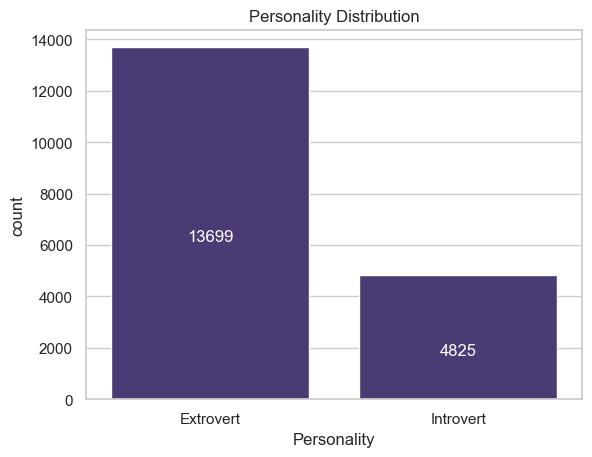

In [8]:
# plot the personality Distribution.

sns.set_theme(style='whitegrid', palette='viridis')
ax = sns.countplot(x=train['Personality'])
ax.bar_label(ax.containers[0], padding=-10, label_type='center', color='white')
plt.title('Personality Distribution')
plt.show()

* **`74%`** of the data are **`Extroverts`**, and **`26%`** are **`Introverts`**. This distribution conforms with the notion that **`Introverts`** are a minority in the society. 

--------

#####  Creating a plot of pairwise relationships in the data

This will help us visualize the relationships between variables in the data

<Figure size 1500x800 with 0 Axes>

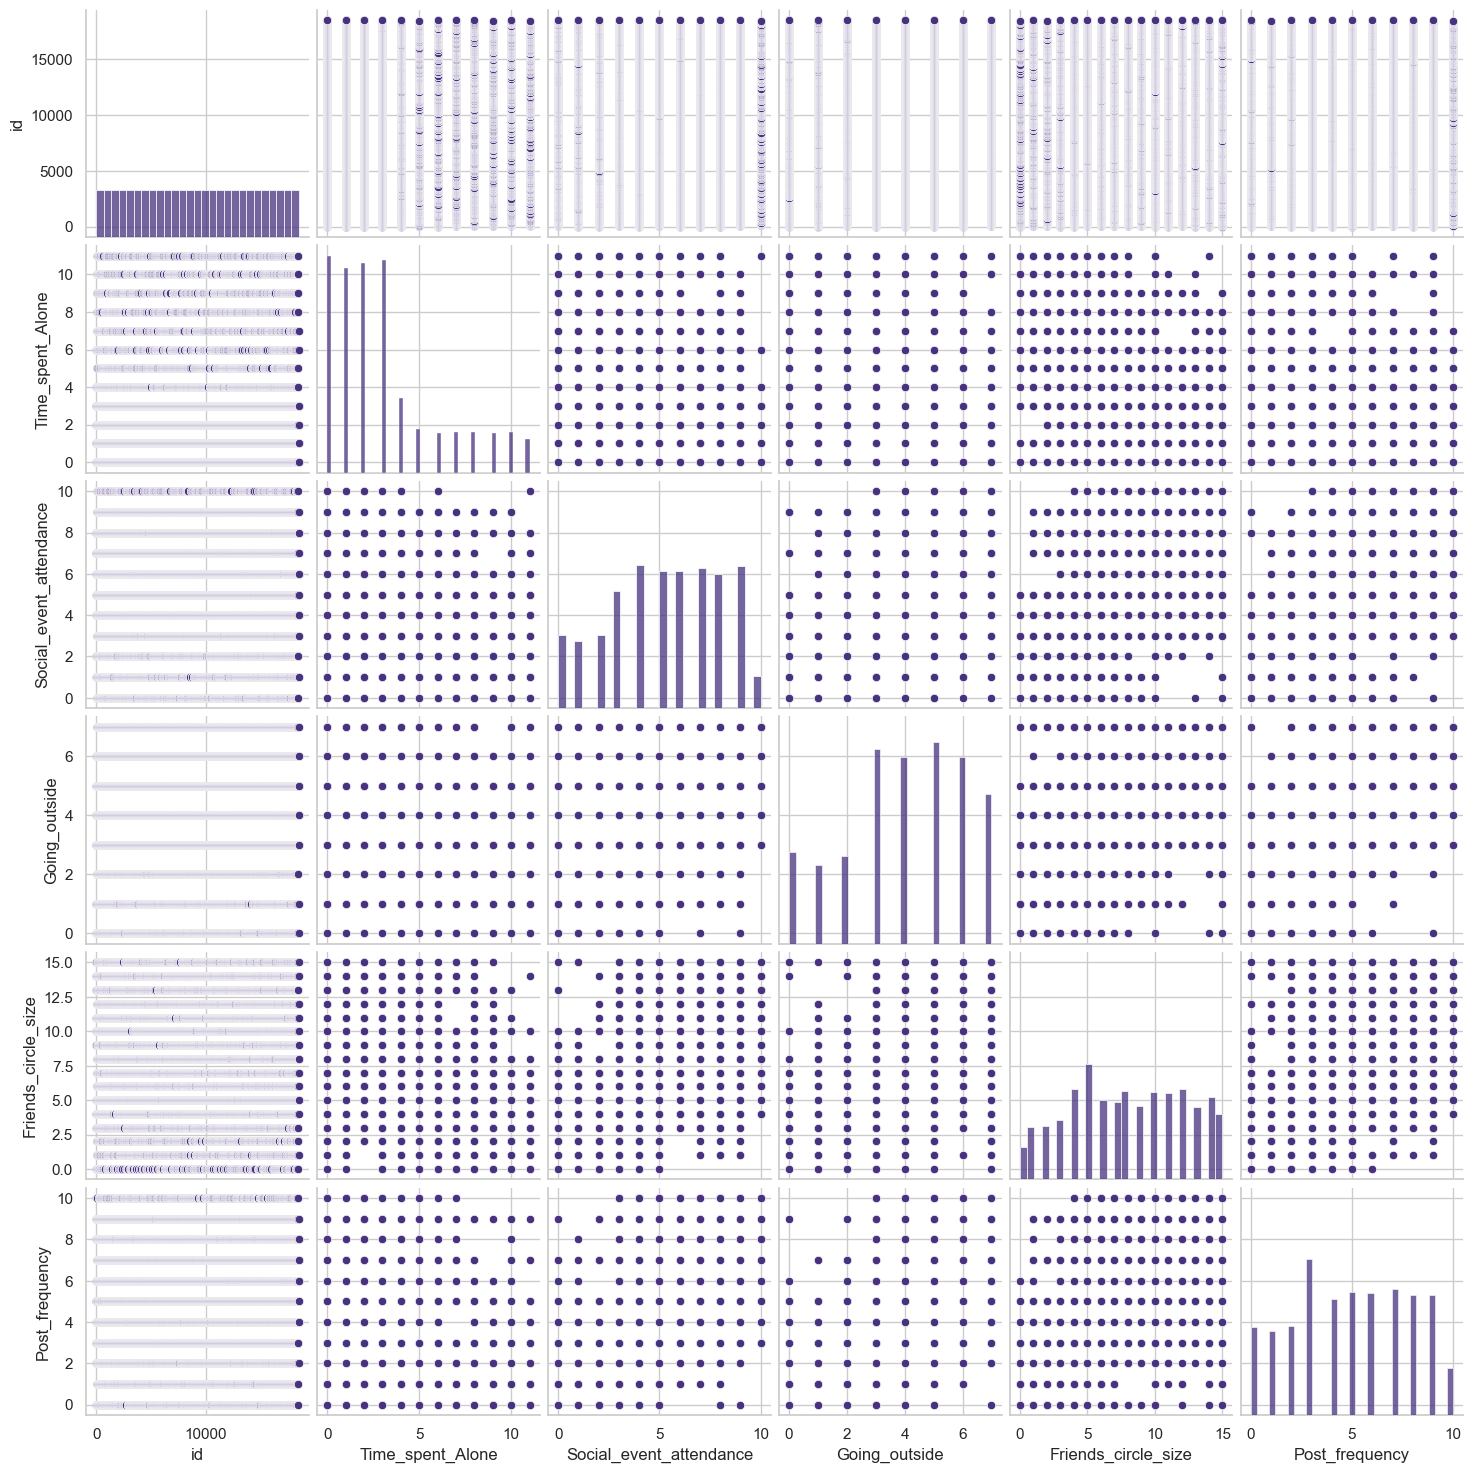

In [9]:
plt.figure(figsize=(15,8))
sns.pairplot(train)

* Since raw data inherits some sort of normal distribution, we can tell that this is synthetic data or data that has undergone preprocessing.

---------

#### Creating a correlation matrix

* In order to get a better understanding of features that contribute the most to personality type, we will create a corr matrix.

In [10]:
# first we will convert categorical columns into numerical.
train_corr = train.copy()

# yes or no columns
cat_cols = ['Stage_fear','Drained_after_socializing']
mapping = {'Yes':1, 'No':0}

for col in cat_cols:
    train_corr[col] = train_corr[col].map(mapping)

# personality column
person_type = {'Extrovert':1, 'Introvert':0}
train_corr['Personality'] = train_corr['Personality'].map(person_type)

In [11]:
train_corr.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,1
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,1
2,2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,0
3,3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,1
4,4,1.0,0.0,4.0,4.0,0.0,13.0,NaN,1


<Axes: >

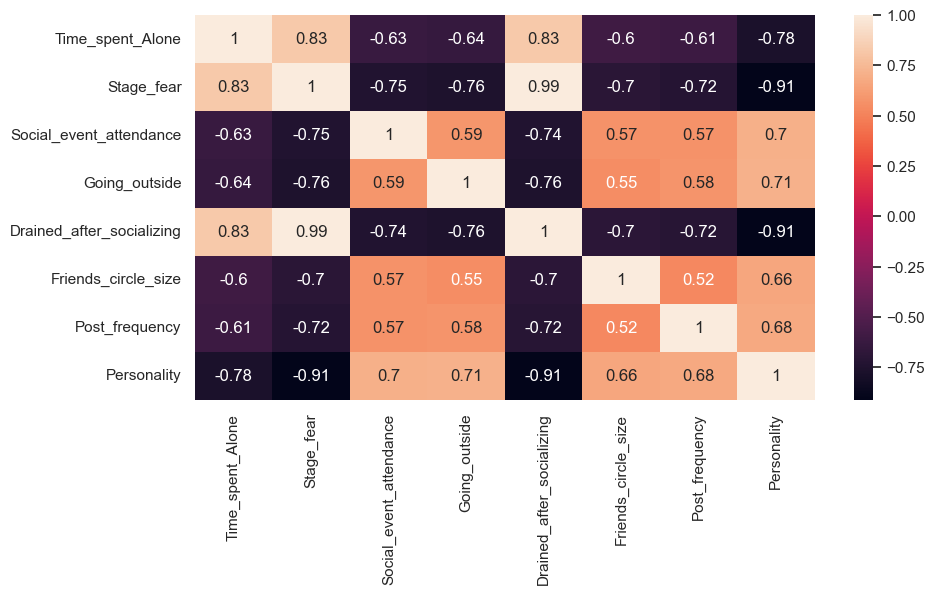

In [12]:
corr_matrix = train_corr.drop('id', axis=1).corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True)

* **`Going outside`** and **`Social events attendance`** have the strongest correlation with the personality type **`Extrovert`**.
* **`Drained after socializing`** and **`Stage fear`** have the strongest correlation with the personality type **`Introvert`**.


----------

### Data Preprocessing

* In this stage we will combine the train and test data with the original dataset so we can improve our model performance, and we will make sure that our data is clean, numeric, and scaled for more accurate results.

#### Dealing with duplicates and missing values

##### Original Dataset

In [13]:
original.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [14]:
original.shape

(2900, 8)

In [15]:
original.isna().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [16]:
original.duplicated().sum()

402

In [17]:
# Dropping duplicated 
original = original.drop_duplicates()

------------

##### Train Dataset

In [18]:
train.isna().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [19]:
ratio = train.isna().sum() / len(train) *100
ratio

id                            0.000000
Time_spent_Alone              6.424098
Stage_fear                   10.219175
Social_event_attendance       6.370114
Going_outside                 7.914057
Drained_after_socializing     6.202764
Friends_circle_size           5.689916
Post_frequency                6.823580
Personality                   0.000000
dtype: float64

* The missing values in the train dataset varies between 5% and 10%; From our previous analysis, we found out that there are features that contribute more to personality type than others, so we will remove missing values from the most important features and replace the other features with their mode value.

In [20]:
# Dropping missing values from the most important features

important_features = ['Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing']
train = train.dropna(subset=important_features)


In [21]:
# Filling missing values in less important features with the mode value

less_important = ['Time_spent_Alone', 'Friends_circle_size', 'Post_frequency']

for col in less_important:
    mode_value = train[col].mode()[0]
    train[col] = train[col].fillna(mode_value)

In [22]:
train.duplicated().sum()

0

In [23]:
train.shape

(13083, 9)

-----------------

##### Merging Datasets

In [24]:
# first we will change the name of personality col in original data
original = original.rename(columns={'Personality':'Personality_type'})

# Next we will merge datasets together
merge_cols = ['Time_spent_Alone','Stage_fear','Social_event_attendance','Going_outside','Drained_after_socializing'
              ,'Friends_circle_size','Post_frequency']

train = train.merge(original, how='left', on=merge_cols)
test = test.merge(original, how='left', on=merge_cols)



In [25]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Personality_type
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,NaN
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,NaN
2,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,NaN
3,4,1.0,No,4.0,4.0,No,13.0,3.0,Extrovert,NaN
4,5,2.0,No,8.0,5.0,No,5.0,3.0,Extrovert,NaN


In [26]:
train.shape

(13087, 10)

In [27]:
# Filling the NaN values in the personality_type col with 'Unkown'
train['Personality_type'] = train['Personality_type'].fillna('Unknown')
test['Personality_type'] = test['Personality_type'].fillna('Unknown')


In [28]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Personality_type
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert,Unknown
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert,Unknown
2,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert,Unknown
3,4,1.0,No,4.0,4.0,No,13.0,3.0,Extrovert,Unknown
4,5,2.0,No,8.0,5.0,No,5.0,3.0,Extrovert,Unknown


In [29]:
# Converting categorical cols to numeric
# first yes/no cols
yes_no_cols = ['Stage_fear', 'Drained_after_socializing']
yes_no_map = {'Yes':1, 'No':0}

for col in yes_no_cols:
    train[col] = train[col].map(yes_no_map)
    test[col] = test[col].map(yes_no_map)

# personality feature col
feature_map = {'Extrovert':2, 'Introvert':1, 'Unknown':0}

train['Personality_type'] = train['Personality_type'].map(feature_map)
test['Personality_type'] = test['Personality_type'].map(feature_map)

# personality target col
target_map = {'Extrovert':1, 'Introvert':0}

train['Personality'] = train['Personality'].map(target_map)


#### Splitting and Scaling data

* We will split train data into **`X`** feature data and **`Y`** target data and since we will use a tree-based model,we won't need to scale or normalize our data.

In [30]:
# Splitting the data

X = train.drop(['id', 'Personality'], axis=1)
Y = train['Personality']
valid_data = test.drop('id', axis=1)

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.metrics as metrics

* Since we have imbalanced data in our target classes (74% Extroverts, 26% Introverts), we will stratify our data on Y so we can guarantee that the less frequent class is represented in the training data with the same percentage as in the original data before splitting. 

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, stratify=Y, random_state=0)

### Model Building

* We will start with a Decision Tree model and build on it.

In [33]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(x_train,y_train)

dt_preds = decision_tree.predict(x_test)

#### Results and Evaluation

In [34]:
print('Decision Tree :')
print('Accuracy :', '%.6f' % metrics.accuracy_score(y_test,dt_preds))
print('Precision :', '%.6f' % metrics.precision_score(y_test,dt_preds))
print('Recall :', '%.6f' % metrics.recall_score(y_test,dt_preds))
print('F1 :', '%.6f' % metrics.f1_score(y_test,dt_preds))

Decision Tree :
Accuracy : 0.928484
Precision : 0.959293
Recall : 0.951257
F1 : 0.955258


In [48]:
# create table of results

Accuracy = metrics.accuracy_score(y_test,dt_preds)
Precision = metrics.precision_score(y_test,dt_preds)
Recall = metrics.recall_score(y_test,dt_preds)
F1 = metrics.f1_score(y_test,dt_preds)
Roc_Auc = metrics.roc_auc_score(y_test,dt_preds)

decision_tree_results = pd.DataFrame({'Model' : ['Decision Tree'],
                                      'Accuracy' : [Accuracy],
                                      'Precision': [Precision],
                                      'Recall' : [Recall],
                                      'F1' : [F1],
                                      'Roc_Auc' : [Roc_Auc]
                                       })
decision_tree_results

,Model,Accuracy,Precision,Recall,F1,Roc_Auc
0,Decision Tree,0.928484,0.959293,0.951257,0.955258,0.893585


#### Confusion Matrix

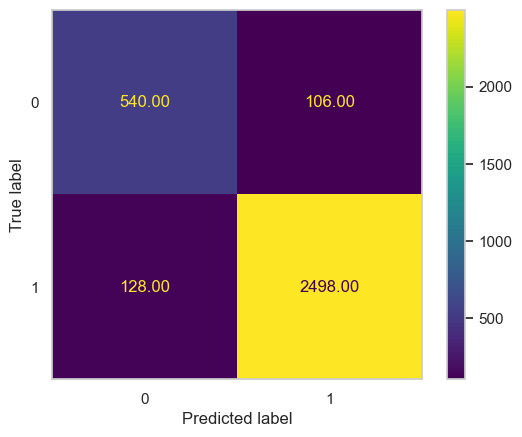

In [35]:
cm = metrics.confusion_matrix(y_test, dt_preds, labels=decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=decision_tree.classes_)
disp.plot(values_format='.2f')
plt.grid(False)

* The matrix has a high proportion of true positives (2498) and predicting `Extroverts` which is normal since `Extroverts` make almost 75% of the data.
* The matrix has a relatively small false positive (106) where inaccurately the model predicts that the person is `Extrovert` when he is not.
* The matrix has a relatively high false negative (128) where inaccurately the model predicts that a person is `Introvert` when he is not.
* The model is good for predicting the `Extroverts` but very poor in predicting `Introverts`.

#### Hyperparameter Tuning

We will apply hyperparameter tuning using grid search and cross validation to improve model performance.

In [41]:
param = {'max_depth': [10,20,30,None],
         'min_samples_split': [10,20,50,100],
         'min_weight_fraction_leaf':[0.1,0.2,0.25,0.3]
        }

scoring = ['accuracy', 'precision', 'recall', 'roc_auc','f1']

In [42]:
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_decision_tree,
                   param,
                   scoring = scoring,
                   cv = 5,
                   refit='f1')

clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_split': [10, 20, 50, 100],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.25, 0.3]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'f1'])

In [43]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.1, random_state=0)

In [44]:
clf.best_score_

0.9777991355795143

#### Determine the best Tuned Decision Tree's Parameters

In [49]:

def make_results(model_name,model_object):

    cv_results = pd.DataFrame(model_object.cv_results_)

    # isolate the row with the max f1 score
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(),:]
    
    f1 = best_estimator_results.mean_test_f1
    accuracy = best_estimator_results.mean_test_accuracy
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    roc_auc = best_estimator_results.mean_test_roc_auc

    # create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'Accuracy' : [accuracy],
                          'Precision': [precision],
                          'Recall' : [recall],
                          'F1' : [f1],
                          'Roc_Auc' : [roc_auc]
                         })
    return table

results = make_results('Tuned Decision Tree',clf)

    
final_results = pd.concat([results,decision_tree_results], axis=0)
final_results


,Model,Accuracy,Precision,Recall,F1,Roc_Auc
0,Tuned Decision Tree,0.964238,0.974169,0.981462,0.977799,0.943687
0,Decision Tree,0.928484,0.959293,0.951257,0.955258,0.893585


* After tuning our model, all metrics scores have significantly improved; any further improvement will not be meaningful to the model except for the risk of overfitting.

* The tuned model is `96.42%` accurate.
* `Precision Score` measures the proportion of predicted positives that are truly positive, which is `97.416%`.
* `Recall Score` measures the percentage of actual positives the model correctly identified, which is `98.146%`.
* `F1 Score` balances precision and recall; it is their harmonic mean.

#### Optimal Model

In [59]:
# The optimal model is the model with the best parameters and best scores

opt_dt = DecisionTreeClassifier(max_depth=10, min_samples_split=10,
                                min_weight_fraction_leaf=0.1, random_state=0
                               )
opt_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.1, random_state=0)

### Final Predictions and submission


* We will use our optimal trained model and apply it to the hold-out test data.

In [60]:
final_predictions = opt_dt.predict(valid_data)

In [62]:
# Reverse encoded values to its original meanings
names = {1:'Extrovert', 0:'Introvert'}

final_predictions = pd.Series(final_predictions).map(names)

In [63]:
final_predictions.head()

0    Extrovert
1    Introvert
2    Extrovert
3    Extrovert
4    Introvert
dtype: object

#### Create Submission File

In [64]:
submission = pd.DataFrame({'id': test['id'], 'Personality': final_predictions})
submission.head()

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


In [65]:
submission.to_csv('Final_Predictions.csv', index=False)

-------

Thank You.